In [10]:
%pylab inline
pylab.rcParams['figure.figsize'] = (20, 20)

import imageio
import numpy as np

Populating the interactive namespace from numpy and matplotlib


In [36]:
class LightFieldImage:
    def __init__(self, SuperImagePath, W, H):
        self.superImage = imageio.imread(SuperImagePath)
        self.lightFieldDimension = (W, H)
    
    def PlotLightFields(self):
        lightFieldM, lightFieldN = self.lightFieldDimension
        superImageH, superImageW, _ = self.superImage.shape
        lightFieldH = superImageH / lightFieldN
        lightFieldW = superImageW / lightFieldM
        
        for y in range(lightFieldN):
            for x in range(lightFieldM):
                subplot(lightFieldN, lightFieldM, y * lightFieldN + x + 1)
                YStart, YEnd = y * lightFieldH, (y + 1) * lightFieldH
                XStart, XEnd = x * lightFieldW, (x + 1) * lightFieldW
                imshow(self.superImage[YStart:YEnd, XStart:XEnd])
                
    def CreateApertureView(self):
        superImageH, superImageW, _ = self.superImage.shape
        lightFieldM, lightFieldN = self.lightFieldDimension
        superImageH, superImageW, _ = self.superImage.shape
        lightFieldH = superImageH / lightFieldN
        lightFieldW = superImageW / lightFieldM
        
        View = np.zeros_like(self.superImage)
        
        SImXs = np.tile(np.arange(0, superImageW - lightFieldW + 1, lightFieldW), lightFieldM)
        SImYs = np.repeat(np.arange(0, superImageH - lightFieldH + 1, lightFieldH), lightFieldN)
        
        for Y in range(lightFieldH):
            for X in range(lightFieldW):
                VYStart, VYEnd = (Y * lightFieldN), ((Y + 1) * lightFieldN)
                VXStart, VXEnd = (X * lightFieldM), ((X + 1) * lightFieldM)
                
                DataSlice = self.superImage[SImYs + Y, SImXs + X]
                View[VYStart:VYEnd,VXStart:VXEnd, :] = DataSlice.reshape(lightFieldN, lightFieldM, 3)                
        
        self.apertureView = View
        return View
    
    def PlotApertureView(self):
        imshow(self.apertureView)
        
    def SaveApertureView(self, fName):
        imageio.imsave(fName, self.apertureView)
        
    def EpipolarHorizontalSlice(self, H):
        superImageW = self.superImage.shape[1]
        lightFieldM = self.lightFieldDimension[0]
        lightFieldW = superImageW / lightFieldM
        
        SliceStartXs = np.arange(0, superImageW, lightFieldW)
        Epipolar = np.zeros((lightFieldM, lightFieldW, 3), np.uint8)
        
        for I in range(len(SliceStartXs)):
            Epipolar[I] = self.superImage[H, SliceStartXs[I]:SliceStartXs[I] + lightFieldW]
            
        return Epipolar

    def EpipolarVerticalSlice(self, W):
        superImageH = self.superImage.shape[0]
        lightFieldN = self.lightFieldDimension[1]
        lightFieldH = superImageH / lightFieldN
        
        SliceStartYs = np.arange(0, superImageH , lightFieldH)
        Epipolar = np.zeros((lightFieldH, lightFieldN, 3), np.uint8)
        
        for I in range(len(SliceStartYs)):
            Epipolar[:, I] = self.superImage[SliceStartYs[I]:SliceStartYs[I] + lightFieldH, W]
            
        return Epipolar
        
View = LightFieldImage('./data/9x9/matrioska.jpg', 9, 9)        

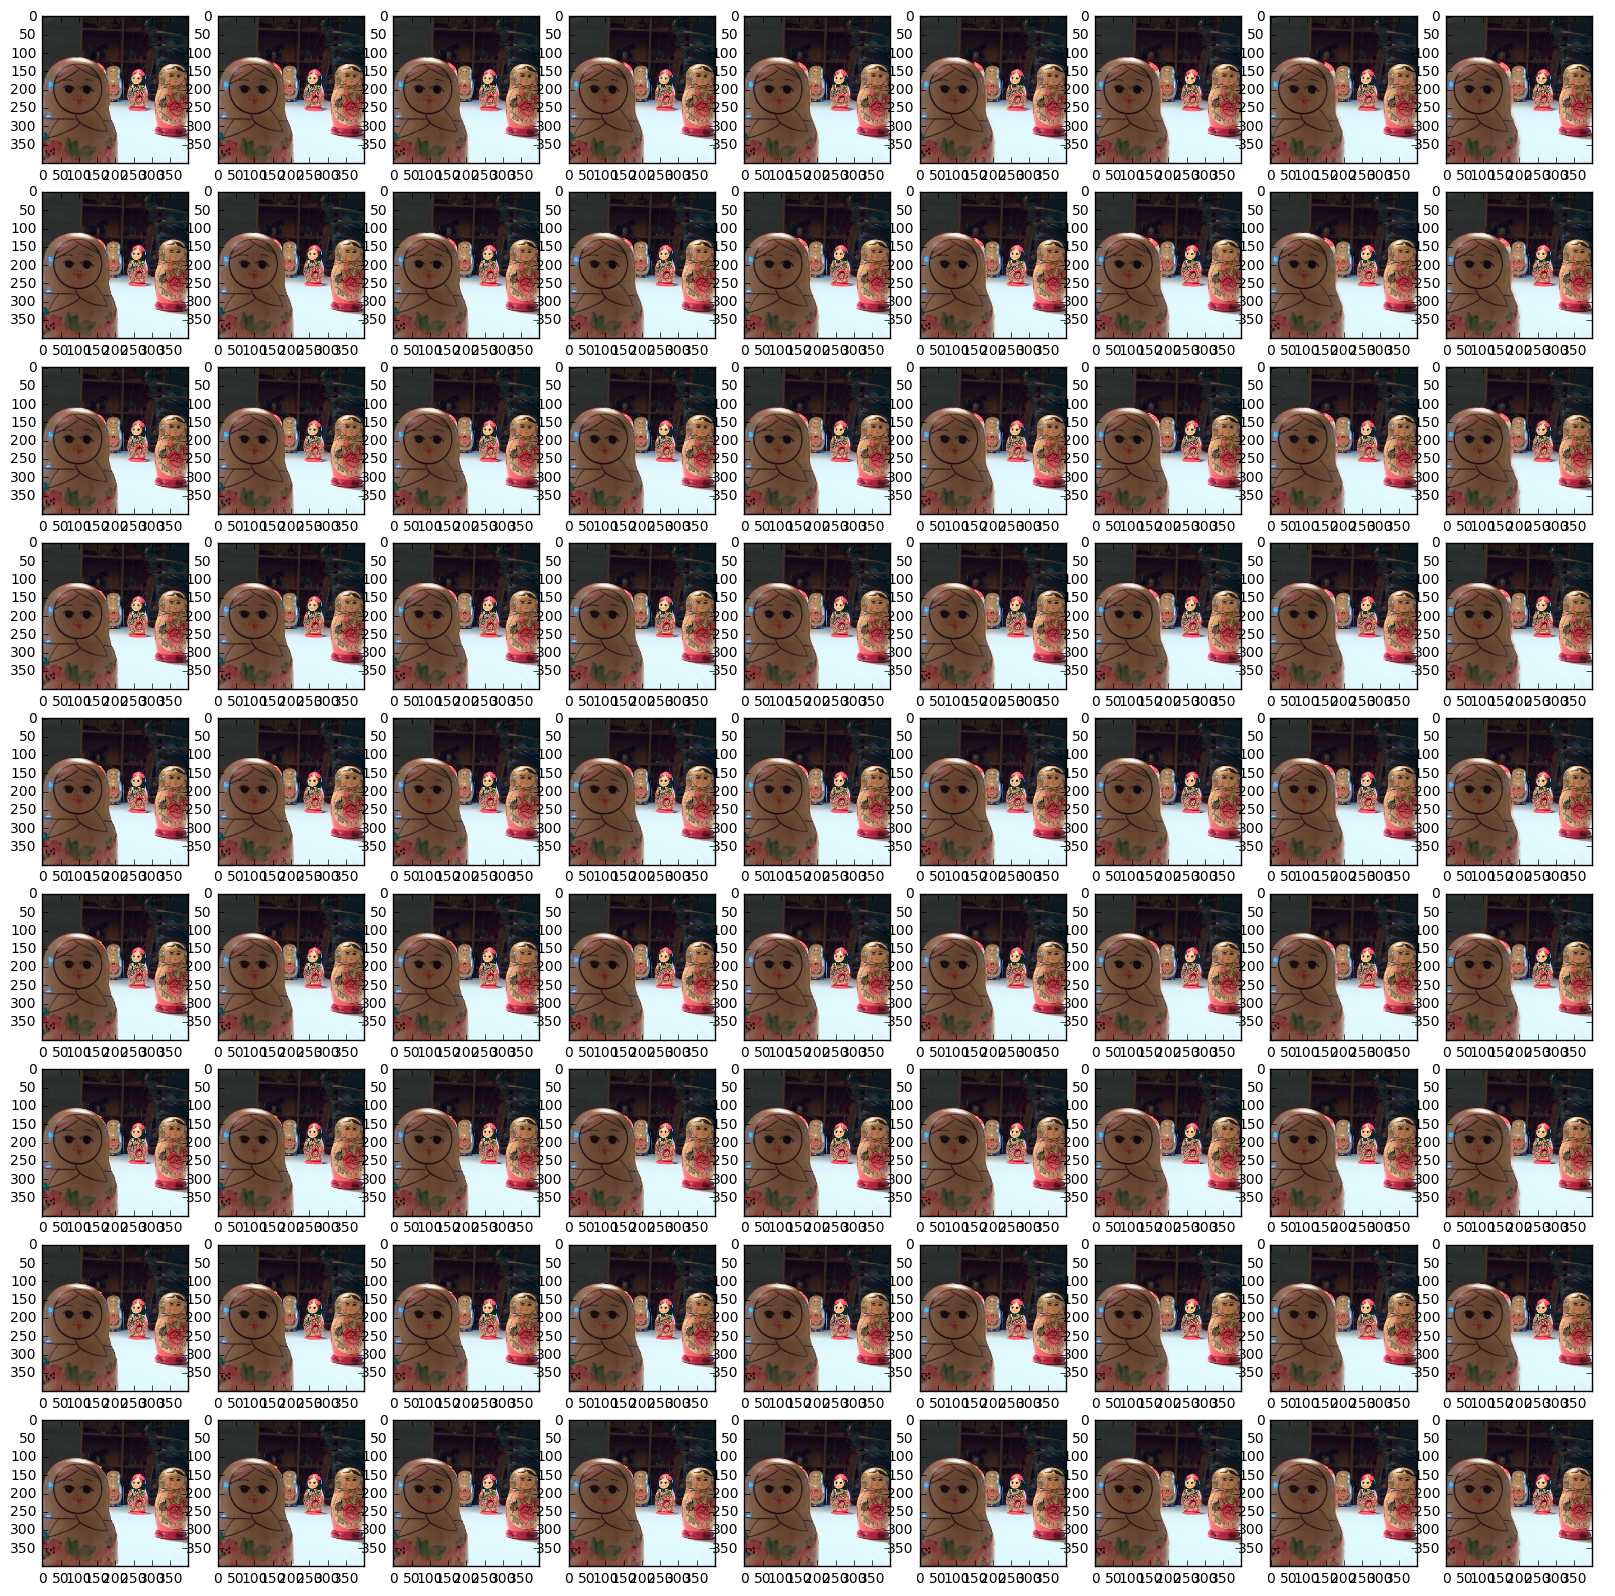

In [12]:
View.PlotLightFields()

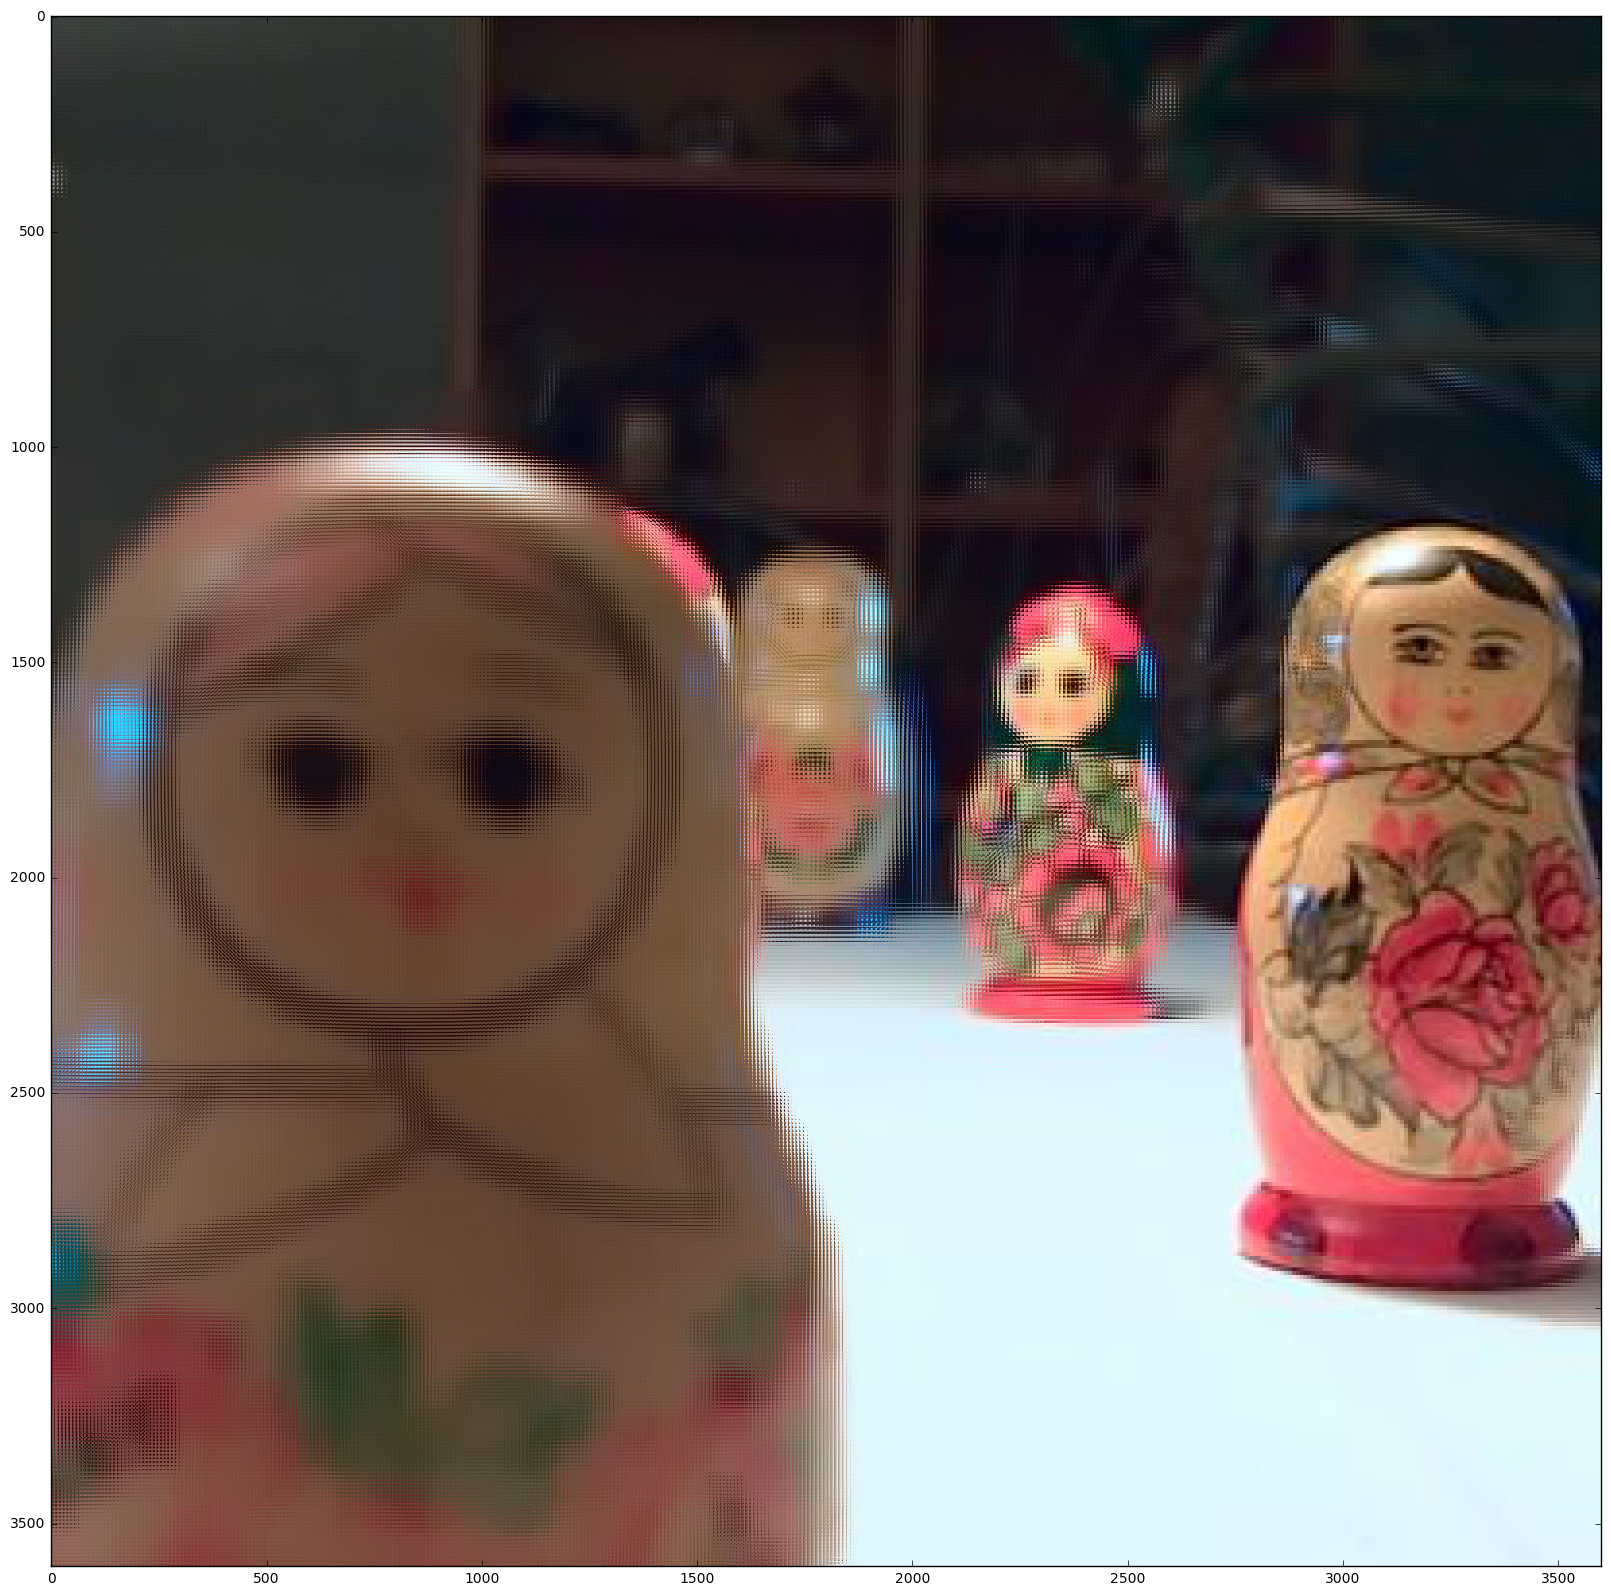

In [13]:
View.CreateApertureView()
View.PlotApertureView()
View.SaveApertureView('matrioska_apertureview.jpg')

In [42]:
files = ['./data/9x9/matrioska.jpg', './data/9x9/motorbike16.jpg', './data/17x17/sanmiguellf.jpg']
lightArrayDims = [[9, 9], [9, 9], [17, 17]]

for index in range(len(files)):
    FileView = LightFieldImage(files[index], lightArrayDims[index][0], lightArrayDims[index][1])
    FileView.CreateApertureView()
    fName = files[index].split('/')[-1].split('.')[0]
    FileView.SaveApertureView(fName + '__apertureview.jpg')

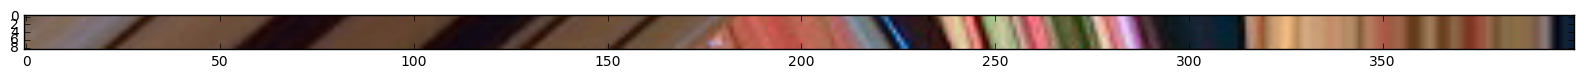

In [37]:
CenterH = View.superImage.shape[0] / 2
HSlice = View.EpipolarHorizontalSlice(CenterH)
imshow(HSlice)
imsave('matrioska_epipolar_horizontal.jpg', HSlice)

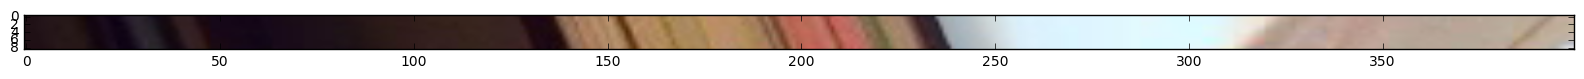

In [40]:
CenterW = View.superImage.shape[1] / 2
VSlice = View.EpipolarVerticalSlice(CenterW)
imshow(np.swapaxes(VSlice, 0, 1))
imsave('matrioska_epipolar_vertical.jpg', VSlice)

In [41]:
files = ['./data/9x9/matrioska.jpg', './data/9x9/motorbike16.jpg', './data/17x17/sanmiguellf.jpg']
lightArrayDims = [[9, 9], [9, 9], [17, 17]]

for index in range(len(files)):
    FileView = LightFieldImage(files[index], lightArrayDims[index][0], lightArrayDims[index][1])
    fName = files[index].split('/')[-1].split('.')[0]
    CenterW, CenterH = FileView.superImage.shape[1] / 2, FileView.superImage.shape[0] / 2
    VSlice = FileView.EpipolarVerticalSlice(CenterW)
    HSlice = FileView.EpipolarHorizontalSlice(CenterH)
    imsave(fName + '__epipolar_horizontal.jpg', HSlice)
    imsave(fName + '__epipolar_vertical.jpg', VSlice)
